In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

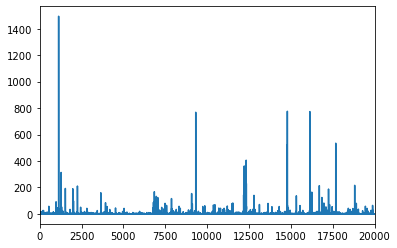

In [4]:
def e_detector_sr(data, lmbda, alt):
    N = len(data)
    E = np.zeros(N)
    M = np.zeros(len(alt))
    L = np.zeros(len(alt))
    for i in range(N):
        L = np.exp(lmbda-alt) * (alt/lmbda)**data[i]
        M = L*(M+1)
        E[i] = np.average(M)
    return(E)

#data = np.concatenate((np.random.poisson(100, 2000),np.random.poisson(110, 20),np.random.poisson(100, 2000)))
data = np.random.poisson(100, 20000)
plt.plot(e_detector_sr(data, 100, np.array([110,120,130,140,150,160,170,180,190,200])))
plt.xlim((0,len(data)))
plt.show()

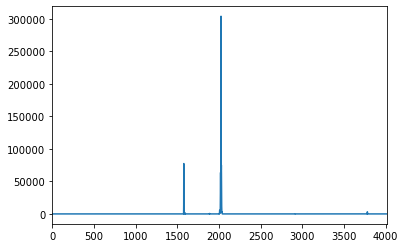

In [5]:
def e_detector_cusum(data, lmbda, alt):
    N = len(data)
    E = np.zeros(N)
    M = np.zeros(len(alt))
    L = np.zeros(len(alt))
    for i in range(N):
        L = np.exp(lmbda-alt) * (alt/lmbda)**data[i]
        M = L*np.maximum(M,1)
        E[i] = np.average(M)
    return(E)

data = np.concatenate((np.random.poisson(100, 2000),np.random.poisson(110, 20),np.random.poisson(100, 2000)))
#data = np.random.poisson(100, 2000000)
plt.plot(e_detector_sr(data, 100, np.array([110,120,130,140,150,160,170,180,190,200])))
plt.xlim((0,len(data)))
plt.show()

In [6]:
model_ids = ['180703949','170803729','140624423']
#parameters
num = 0
model_id = model_ids[num]
fluences=np.arange(start=0, stop=351, step=10)
hmax=256
bin_width=0.05
fluence=200
data = pd.read_csv("simulations.csv", index_col="time") #contains simulations of each burst containing 10000 photons


Text(0.5, 1.0, 'Simulation of GRB 180703949 with photon count 200')

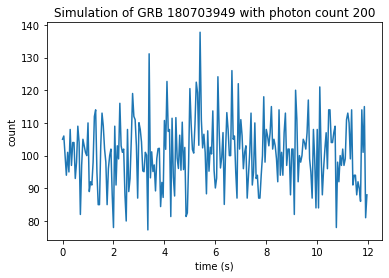

In [7]:
background = data['background']
burst_shape = data[model_id]
grb = background + fluence/100000 * burst_shape #rescaled model of burst with background
grb.plot()
plt.xlabel('time (s)')
plt.ylabel('count')
plt.title(f'Simulation of GRB {model_id} with photon count {fluence}')

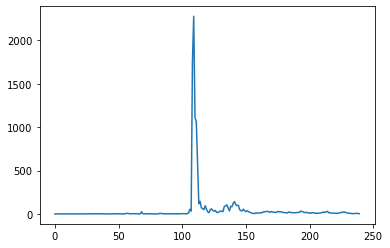

In [15]:
plt.plot(e_detector_sr(np.array(grb), 100,np.array([np.linspace(102,200,1000)])))

In [162]:
alpha_levels = np.linspace(10**4,10**5, 10)
λ = 100
alt = np.array([110,120,130,140,150,160,170,180,190,200])
runs = range(20)
size=2000000



data_esr=pd.DataFrame(index=alpha_levels, columns=runs)
for run in runs:
    np.random.seed(run)
    signal = np.random.poisson(λ, size)
    significance = e_detector_sr(signal, λ, alt)
    for alpha_level in alpha_levels:
        run_length = np.argmax(significance>alpha_level)
        if run_length == 0:
            run_length = size
        data_esr.loc[alpha_level, run] = run_length

data_esr["average"] = data_esr.mean(axis="columns")

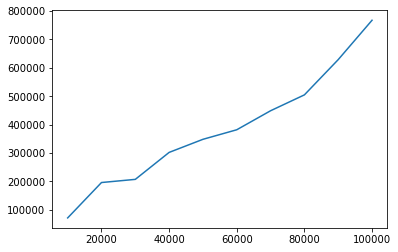

In [166]:
plt.plot(alpha_levels,data_esr["average"])
plt.show()

In [9]:
alpha_levels = np.linspace(10**3,10**4, 10)
λ = 100
alt = np.array([110,120,130,140,150,160,170,180,190,200])
runs = range(20)
size=2000000



data_ecs=pd.DataFrame(index=alpha_levels, columns=runs)
for run in runs:
    np.random.seed(run)
    signal = np.random.poisson(λ, size)
    significance = e_detector_cusum(signal, λ, alt)
    for alpha_level in alpha_levels:
        run_length = np.argmax(significance>alpha_level)
        if run_length == 0:
            run_length = size
        data_ecs.loc[alpha_level, run] = run_length

data_ecs["average"] = data_ecs.mean(axis="columns")

KeyboardInterrupt: 

In [ ]:
alpha_levels = np.linspace(10**4,10**5, 10)
λ = 30
alt = np.array([110,120,130,140,150,160,170,180,190,200])
runs = range(20)
size=2000000



data_esr=pd.DataFrame(index=alpha_levels, columns=runs)
for run in runs:
    np.random.seed(run)
    signal = np.random.poisson(λ, size)
    significance = e_detector_sr(signal, λ, alt)
    for alpha_level in alpha_levels:
        run_length = np.argmax(significance>alpha_level)
        if run_length == 0:
            run_length = size
        data_esr.loc[alpha_level, run] = run_length

data_esr["average"] = data_esr.mean(axis="columns")